# Stroke Prediction

##### Author: Chenyang Skylar Li

# Table of Contents
- [Background](#Background)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    1. [Loaded the dataset into a Pandas dataframe](#1.-Loaded-the-dataset-into-a-Pandas-dataframe)
    2. [Checked the dataset's shape, columns, and first few rows](#2.-Checked-the-dataset's-shape,-columns,-and-first-few-rows)
    3. [Checked the data basic information, including data types of the columns, and summary statistics](#3.-Checked-the-data-basic-information,-including-data-types-of-the-columns,-and-summary-statistics)
    4. [Checked the distribution of the target variable (stroke) using a count plot](#4.-Checked-the-distribution-of-the-target-variable-(stroke)-using-a-count-plot)
    5. [Checked the distribution of the numerical variables (age, bmi, avg_glucose_level ) using a histogram plot](#5.-Checked-the-distribution-of-the-numerical-variables-(age,-bmi,-avg_glucose_level-)-using-a-histogram-plot)
    6. [Checked the distribution of the categorical variables using count plots](#6.-Checked-the-distribution-of-the-categorical-variables-using-count-plots)
    7. [Checked the missing values in the dataset](#7.-Checked-the-missing-values-in-the-dataset)
    8. [Summary of EDA](#8.-Summary-of-EDA)
- [Data Preprocessing](#Data-Preprocessing)
    1. [Splitting the data into training and testing sets](#1.-Splitting-the-data-into-training-and-testing-sets)
    2. [Handling missing values](#2.-Handling-missing-values)
    3. [Encoding categorical variables](#3.-Encoding-categorical-variables)
    4. [Feature scaling](#4.-Feature-scaling)
    5. [Feature selection](#5.-Feature-selection)
    6. [Handling imbalanced target variable](#6.-Handling-imbalanced-target-variable)
- [Machine Learning Modeling](#Machine-Learning-Modeling)
    1. [Use all features to construct machine learning models](#1.-Use-all-features-to-construct-machine-learning-models)
    2. [Use five selected features to construct machine learning models](#2.-Use-five-selected-features-to-construct-machine-learning-models)
- [Conclusion](#Conclusion)
    1. [Stroke Prediction Results](#1.-Stroke-Prediction-Results)
    2. [Conclusions](#2.-Conclusions)
    3. [Future work](#3.-Future-work)


## Background

Stroke is a serious medical condition that occurs when the blood supply to part of the brain is interrupted or reduced, leading to brain damage and potential long-term disability or death. The risk of stroke is affected by a wide range of factors, including age, gender, hypertension, heart disease, obesity, and smoking.

The `stroke dataset` is a collection of medical records for patients. The dataset includes information on patient demographics, medical history, and lifestyle factors, as well as whether or not each patient had a stroke.

The goal of this dataset is to develop a predictive model that can accurately identify patients who are at high risk of stroke, so that appropriate preventative measures can be taken to reduce their risk.

Please refer to the corresponding[data notebook](../../data/stroke/stroke.ipynb) for more information about the [dataset](../../data/stroke/healthcare-dataset-stroke-data.csv).


## Exploratory Data Analysis

In this exploratory data analysis (EDA) of the healthcare-dataset-stroke-data.csv dataset, we performed the following steps:

### 1. Loaded the dataset into a Pandas dataframe


In [83]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
# Load the dataset into a Pandas dataframe
stroke_data = pd.read_csv("../../data/stroke/healthcare-dataset-stroke-data.csv")


### 2. Checked the dataset's shape, columns, and first few rows


In [85]:
# Check the dataset's shape, columns, and first few rows
stroke_data 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### 3. Checked the data basic information, including data types of the columns, and summary statistics

In [86]:
# Check the data basic information
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [87]:
# Check the data basic statistics
stroke_data.iloc[:, 1:].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 4. Checked the distribution of the target variable (stroke) using a count plot


<Axes: xlabel='stroke', ylabel='count'>

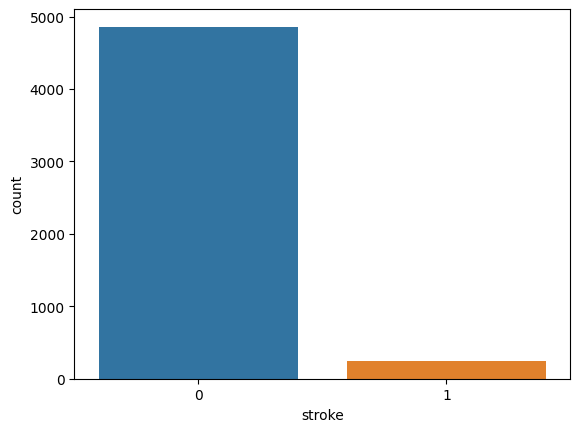

In [88]:
# Check the distribution of the target variable
sns.countplot(x="stroke", data=stroke_data)

### 5. Checked the distribution of the numerical variables (age, bmi, avg_glucose_level ) using a histogram plot


<Axes: xlabel='avg_glucose_level', ylabel='Density'>

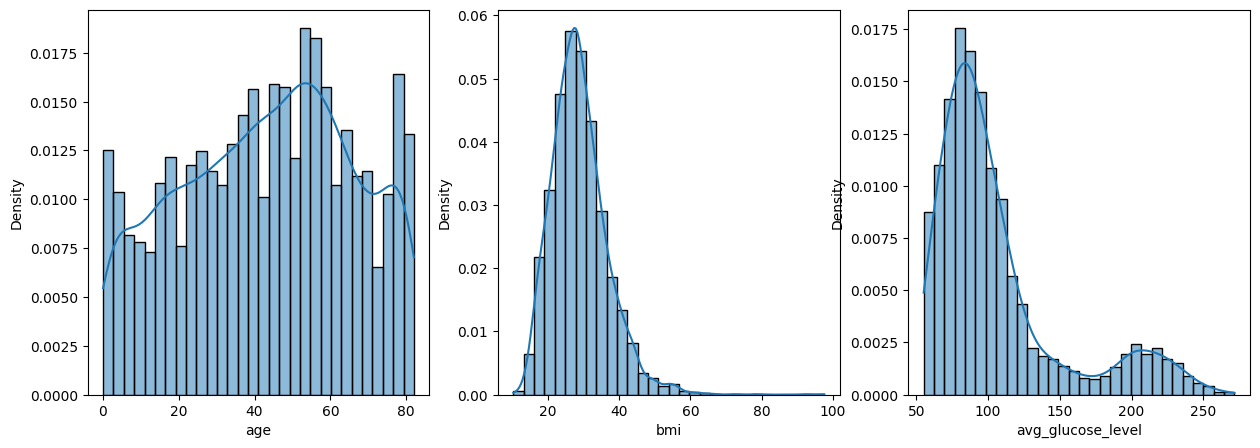

In [89]:
# Check the distribution of the numerical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.histplot(x="age", data=stroke_data, bins=30, ax=axes[0], kde = True, stat = "density", linewidth=1)
sns.histplot(x="bmi", data=stroke_data, bins=30, ax=axes[1], kde = True, stat = "density", linewidth=1)
sns.histplot(x="avg_glucose_level", data=stroke_data, bins=30, ax=axes[2], kde = True, stat = "density", linewidth=1)

### 6. Checked the distribution of the categorical variables using count plots


<Axes: xlabel='smoking_status', ylabel='count'>

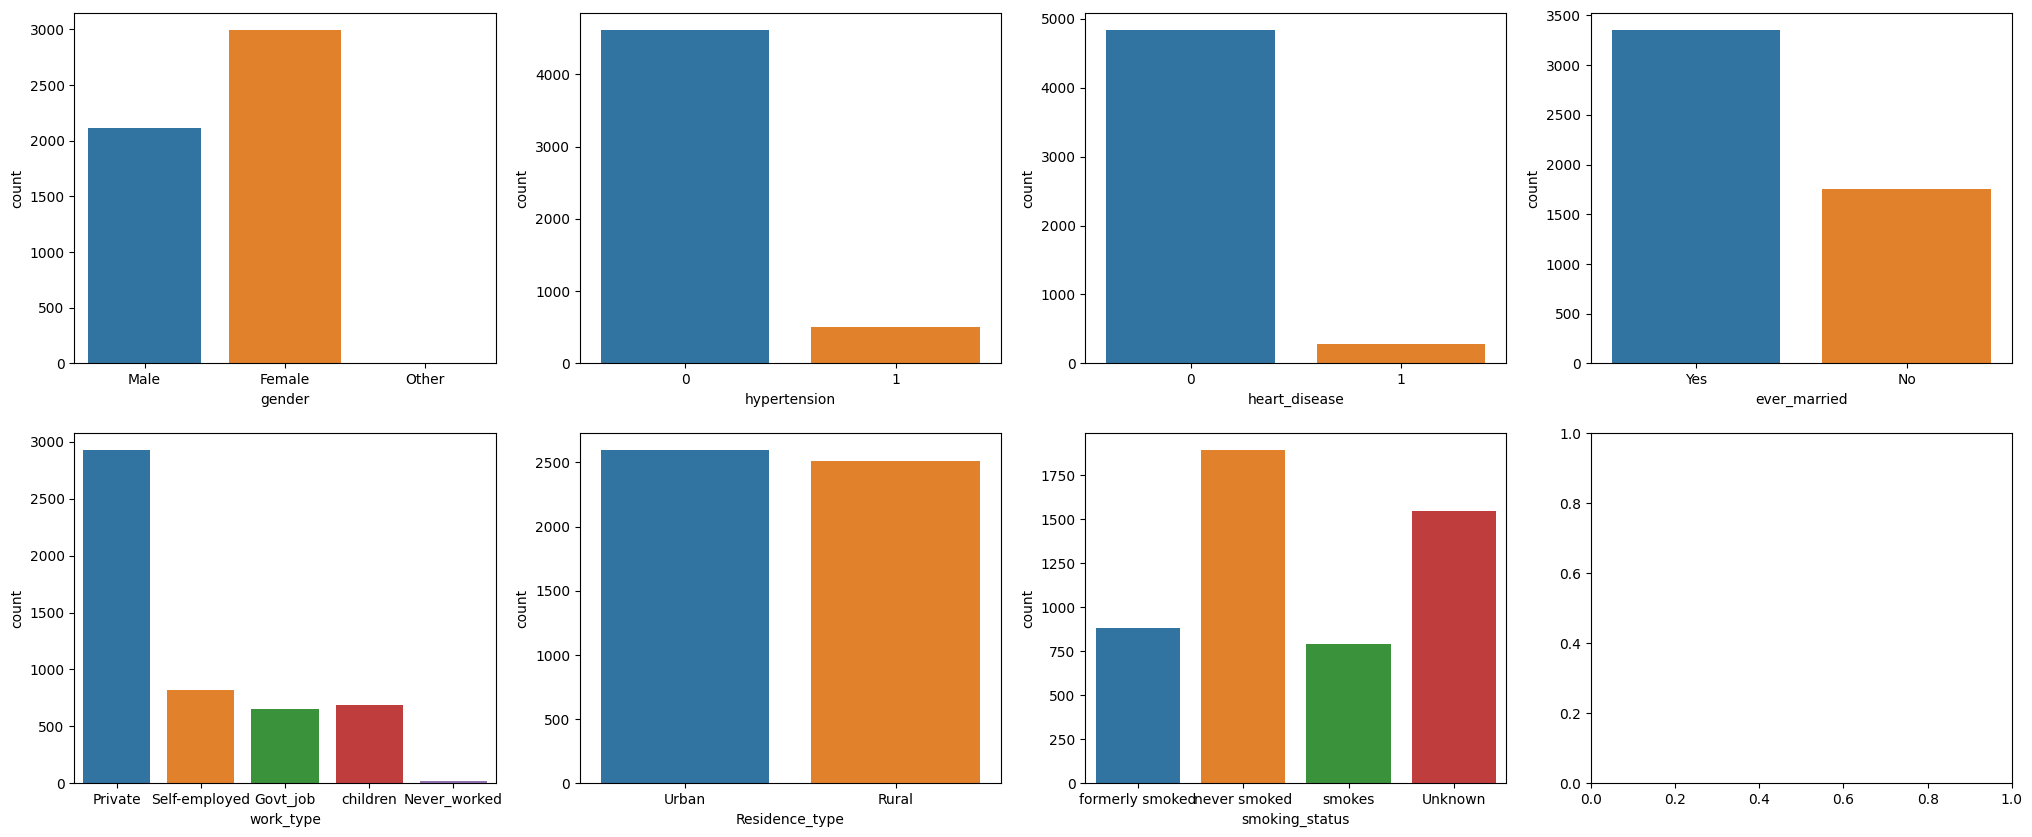

In [90]:
# Check the distribution of the categorical variables
fig, axes = plt.subplots(2, 4, figsize=(25, 10), sharey=False)
sns.countplot(x="gender", data=stroke_data, ax=axes[0,0])
sns.countplot(x="hypertension", data=stroke_data, ax=axes[0,1])
sns.countplot(x="heart_disease", data=stroke_data, ax=axes[0,2])
sns.countplot(x="ever_married", data=stroke_data, ax=axes[0,3])
sns.countplot(x="work_type", data=stroke_data, ax=axes[1,0])
sns.countplot(x="Residence_type", data=stroke_data, ax=axes[1,1])
sns.countplot(x="smoking_status", data=stroke_data, ax=axes[1,2])

### 7. Checked the missing values in the dataset

In [91]:
# Check for missing values
print(stroke_data.isnull().sum())

# Check the stroke status where the bmi is missing
print("#stroke when bmi missing:\n ",stroke_data[stroke_data['bmi'].isnull()]['stroke'].value_counts())

# select smoker status equals to Unknown and calculate the number of rows
print("#smoking unknown:\n ", stroke_data[stroke_data['smoking_status'] == 'Unknown'].shape[0])

# Check the stroke status where smoker status equals to Unknown 
print("#stroke when smoking unknown:\n ",stroke_data[stroke_data['smoking_status'] == 'Unknown']['stroke'].value_counts())


# Check the stroke status where gender equals to Other
print("#stroke when gender equals to other:\n ",stroke_data[stroke_data['gender'] == 'Other']['stroke'].value_counts())


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
#stroke when bmi missing:
  stroke
0    161
1     40
Name: count, dtype: int64
#smoking unknown:
  1544
#stroke when smoking unknown:
  stroke
0    1497
1      47
Name: count, dtype: int64
#stroke when gender equals to other:
  stroke
0    1
Name: count, dtype: int64


### 8. Summary of EDA:

This EDA helped us gain a better understanding of the dataset and identify potential issues with missing values, class imbalance, and feature correlation. We also gained insights into which features may be useful for predicting stroke risk, which can guide our decisions for data preprocessing, feature selection, and model training in future steps of the analysis. We just did simple EDA to get a general idea of the dataset but avoided any in-depth analysis of the relationship between the features and the target variable, which may lead to data snooping bias.

Here is a summary of the features in the stroke dataset:

- `id`: Unique identifier for each row
- `gender`: "Male", "Female" or "Other". **Other only has one instance.**
- `age`: Age of the patient.    **May Normally distributed**
- `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.  **Imbalanced**
- `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.  **Imbalanced**
- `ever_married`: "No" or "Yes".  **Imbalanced**
- `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed".  **Imbalanced**
- `Residence_type`: "Rural" or "Urban".   
- `avg_glucose_level`: Average glucose level in blood.**Bimodal distribution**
- `bmi`: Body mass index.    **Has missing values. May need to impute the missing values or drop the rows with missing values. Skewed normal distribution**
- `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown".   **Has missing values. "Unknown" in smoking_status means that the information is unavailable or missing. Imbalanced**
- `stroke`: 1 if the patient had a stroke or 0 if not.  **Imbalanced**


`Note`: The dataset has a mix of numerical and categorical features. We may need to encode the categorical features to numerical values to use them in machine learning models.


## Data Preprocessing

In this step, we performed the following data preprocessing steps:

### 1. Splitting the data into training and testing sets

We first drope the `id` column since it is not useful for modeling. We also dropped the `gender = Other` since it only has one instance. A machine learning model could struggle to generalize from a category that has only one instance. 

Next, We split the data into training and testing sets using a 80/20 split. We used stratification to ensure that the class distribution is preserved in both the training and testing sets. We used a random state of 42 to ensure that the results are reproducible. We also used the stratify parameter to ensure that the class distribution is preserved in both the training and testing sets.

 We kept the testing set untouched to avoid data leakage.

In [92]:
# Delete all previous variables
for _ in locals().copy():
    if _.startswith('__') or _.startswith('_'):
        continue
    del locals()[_]

In [93]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [94]:
# Re-Load the dataset into a Pandas dataframe
stroke_data = pd.read_csv("../../data/stroke/healthcare-dataset-stroke-data.csv")

# Drop the id column
stroke_data.drop('id', axis=1, inplace=True)

# Drop the gender = Other row
stroke_data.drop(stroke_data[stroke_data['gender'] == 'Other'].index, inplace=True)

# Split the dataset into features and target variable
X = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


### 2. Handling missing values

We observed that the BMI column has some missing values. There are different strategies to handle missing values, including imputation or deletion. **In this case, we could impute the missing values using mean BMI value** since it is normally distributed. We did not choose deletion because dropping data is not always the best strategy since it may lead to a loss of information, especially if the missing values are a small fraction of the dataset. In the case of the stroke dataset, dropping the missing BMI values would mean losing around 4% of the data. Since this is a relatively small fraction of the data, it may be better to impute the missing values instead of dropping them. In addition, the stroke target is imbalanced, dropping the missing value will lose many postive values.

 **For categorical feature "smoking_status", we keeped the missing values "Unknown"** to preserve the missing values as a separate category which did not not bias the analysis towards any specific value. 
 
 We imputed missing values in the training set, and apply the same transformations to the test set.

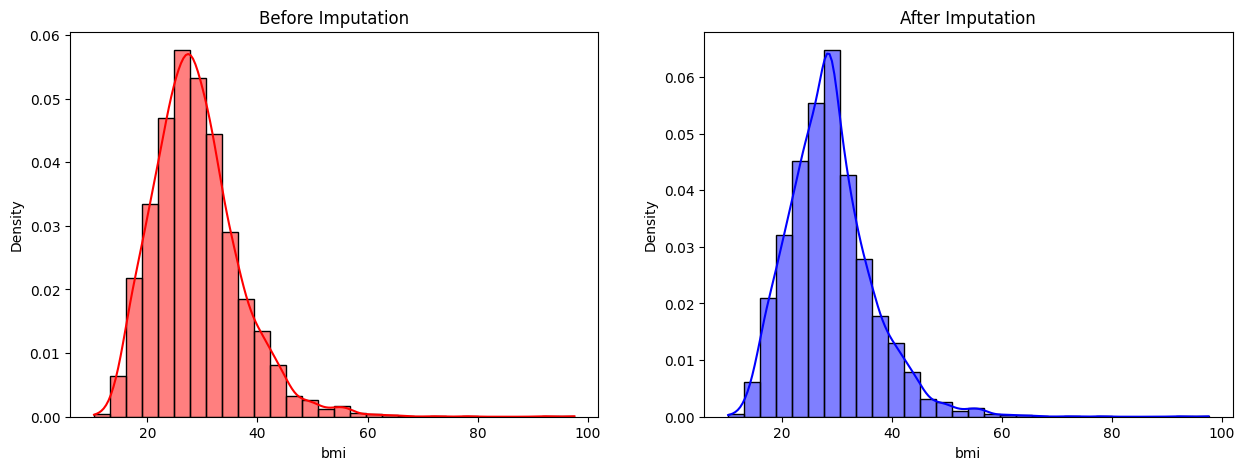

In [95]:
# Handle missing values in the BMI column
imputer = SimpleImputer(strategy="mean")

# Let's make a copy of the original dataset for visualization purposes
X_train_viz = X_train.copy()

# Fit the imputer on the training data
X_train['bmi'] = imputer.fit_transform(X_train[['bmi']])

# Check the distribution of the BMI column in training set after imputation
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
sns.histplot(x="bmi", data=X_train_viz, bins=30, ax=axes[0], kde = True, stat = "density", linewidth=1, color="red").set_title("Before Imputation")
sns.histplot(x="bmi", data=X_train, bins=30, ax=axes[1], kde = True, stat = "density", linewidth=1, color="blue").set_title("After Imputation")

# Transform the test data
X_test['bmi'] = imputer.transform(X_test[['bmi']])

### 3. Encoding categorical variables

 Many machine learning algorithms cannot handle categorical variables directly, so we need to encode them as numerical values. **In this case, we used label encoding** to assign a unique integer value to each category. 

In [96]:
# Encode categorical variables using LabelEncoder
# Define a function to encode categorical variables using LabelEncoder
def label_encode(column):
    le = LabelEncoder()
    # Fit the encoder on the training data
    X_train[column] = le.fit_transform(X_train[column])
    # Transform the test data
    X_test[column] = le.transform(X_test[column])
    # Print the encoded values
    print(f"Encoded values for {column}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Encode categorical variables using LabelEncoder
label_encode("gender")
label_encode("ever_married")
label_encode("work_type")
label_encode("Residence_type")
label_encode("smoking_status")

Encoded values for gender: {'Female': 0, 'Male': 1}
Encoded values for ever_married: {'No': 0, 'Yes': 1}
Encoded values for work_type: {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
Encoded values for Residence_type: {'Rural': 0, 'Urban': 1}
Encoded values for smoking_status: {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


### 4. Feature scaling

**In this case, we scaled numeric features to have a mean of 0 and a standard deviation of 1.** StandardScaler is a popular choice for feature scaling because it preserves the shape of the original distribution while centering the data and making it more interpretable for machine learning algorithms.

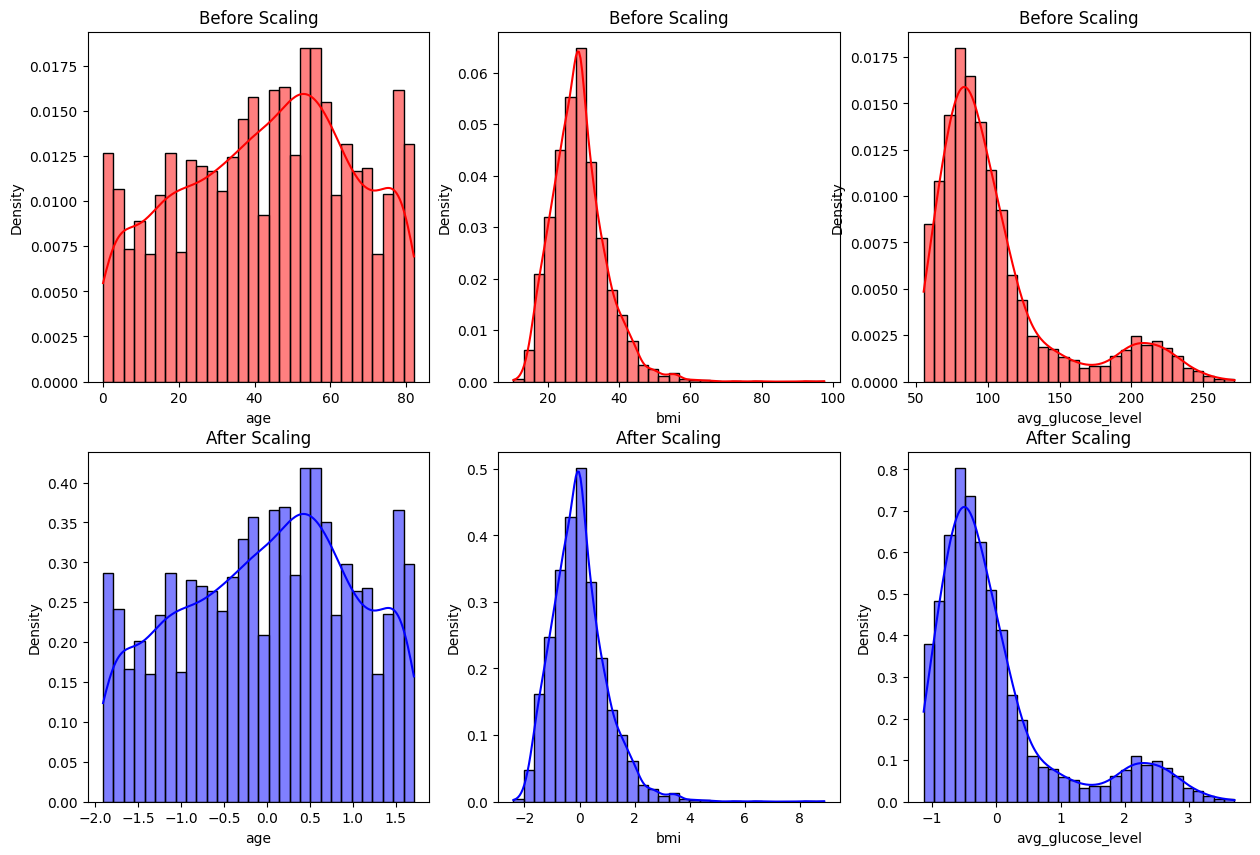

In [97]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
# Let's make a copy of the dataset before scaling for visualization purposes
X_train_viz = X_train.copy()

# numerical columns
numerical_columns = ["age", "bmi", "avg_glucose_level"] 

# Fit the scaler on the training data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])


# Check the distribution after scaling
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=False)
sns.histplot(x="age", data=X_train_viz, bins=30, ax=axes[0,0], kde = True, stat = "density", linewidth=1, color="red").set_title("Before Scaling")
sns.histplot(x="bmi", data=X_train_viz, bins=30, ax=axes[0,1], kde = True, stat = "density", linewidth=1, color="red").set_title("Before Scaling")
sns.histplot(x="avg_glucose_level", data=X_train_viz, bins=30, ax=axes[0,2], kde = True, stat = "density", linewidth=1, color="red").set_title("Before Scaling")
sns.histplot(x="age", data=X_train, bins=30, ax=axes[1,0], kde = True, stat = "density", linewidth=1, color="blue").set_title("After Scaling")
sns.histplot(x="bmi", data=X_train, bins=30, ax=axes[1,1], kde = True, stat = "density", linewidth=1, color="blue").set_title("After Scaling")
sns.histplot(x="avg_glucose_level", data=X_train, bins=30, ax=axes[1,2], kde = True, stat = "density", linewidth=1, color="blue").set_title("After Scaling")

# Transform the test data
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

### 5. Feature selection

We first check the relationship between the features and the target variable in the training data and the correlation between the features.

In [98]:
# Combine the data and target to analyse the relation between features and target
train_data = pd.concat([X_train, y_train], axis=1)

<Axes: xlabel='stroke', ylabel='count'>

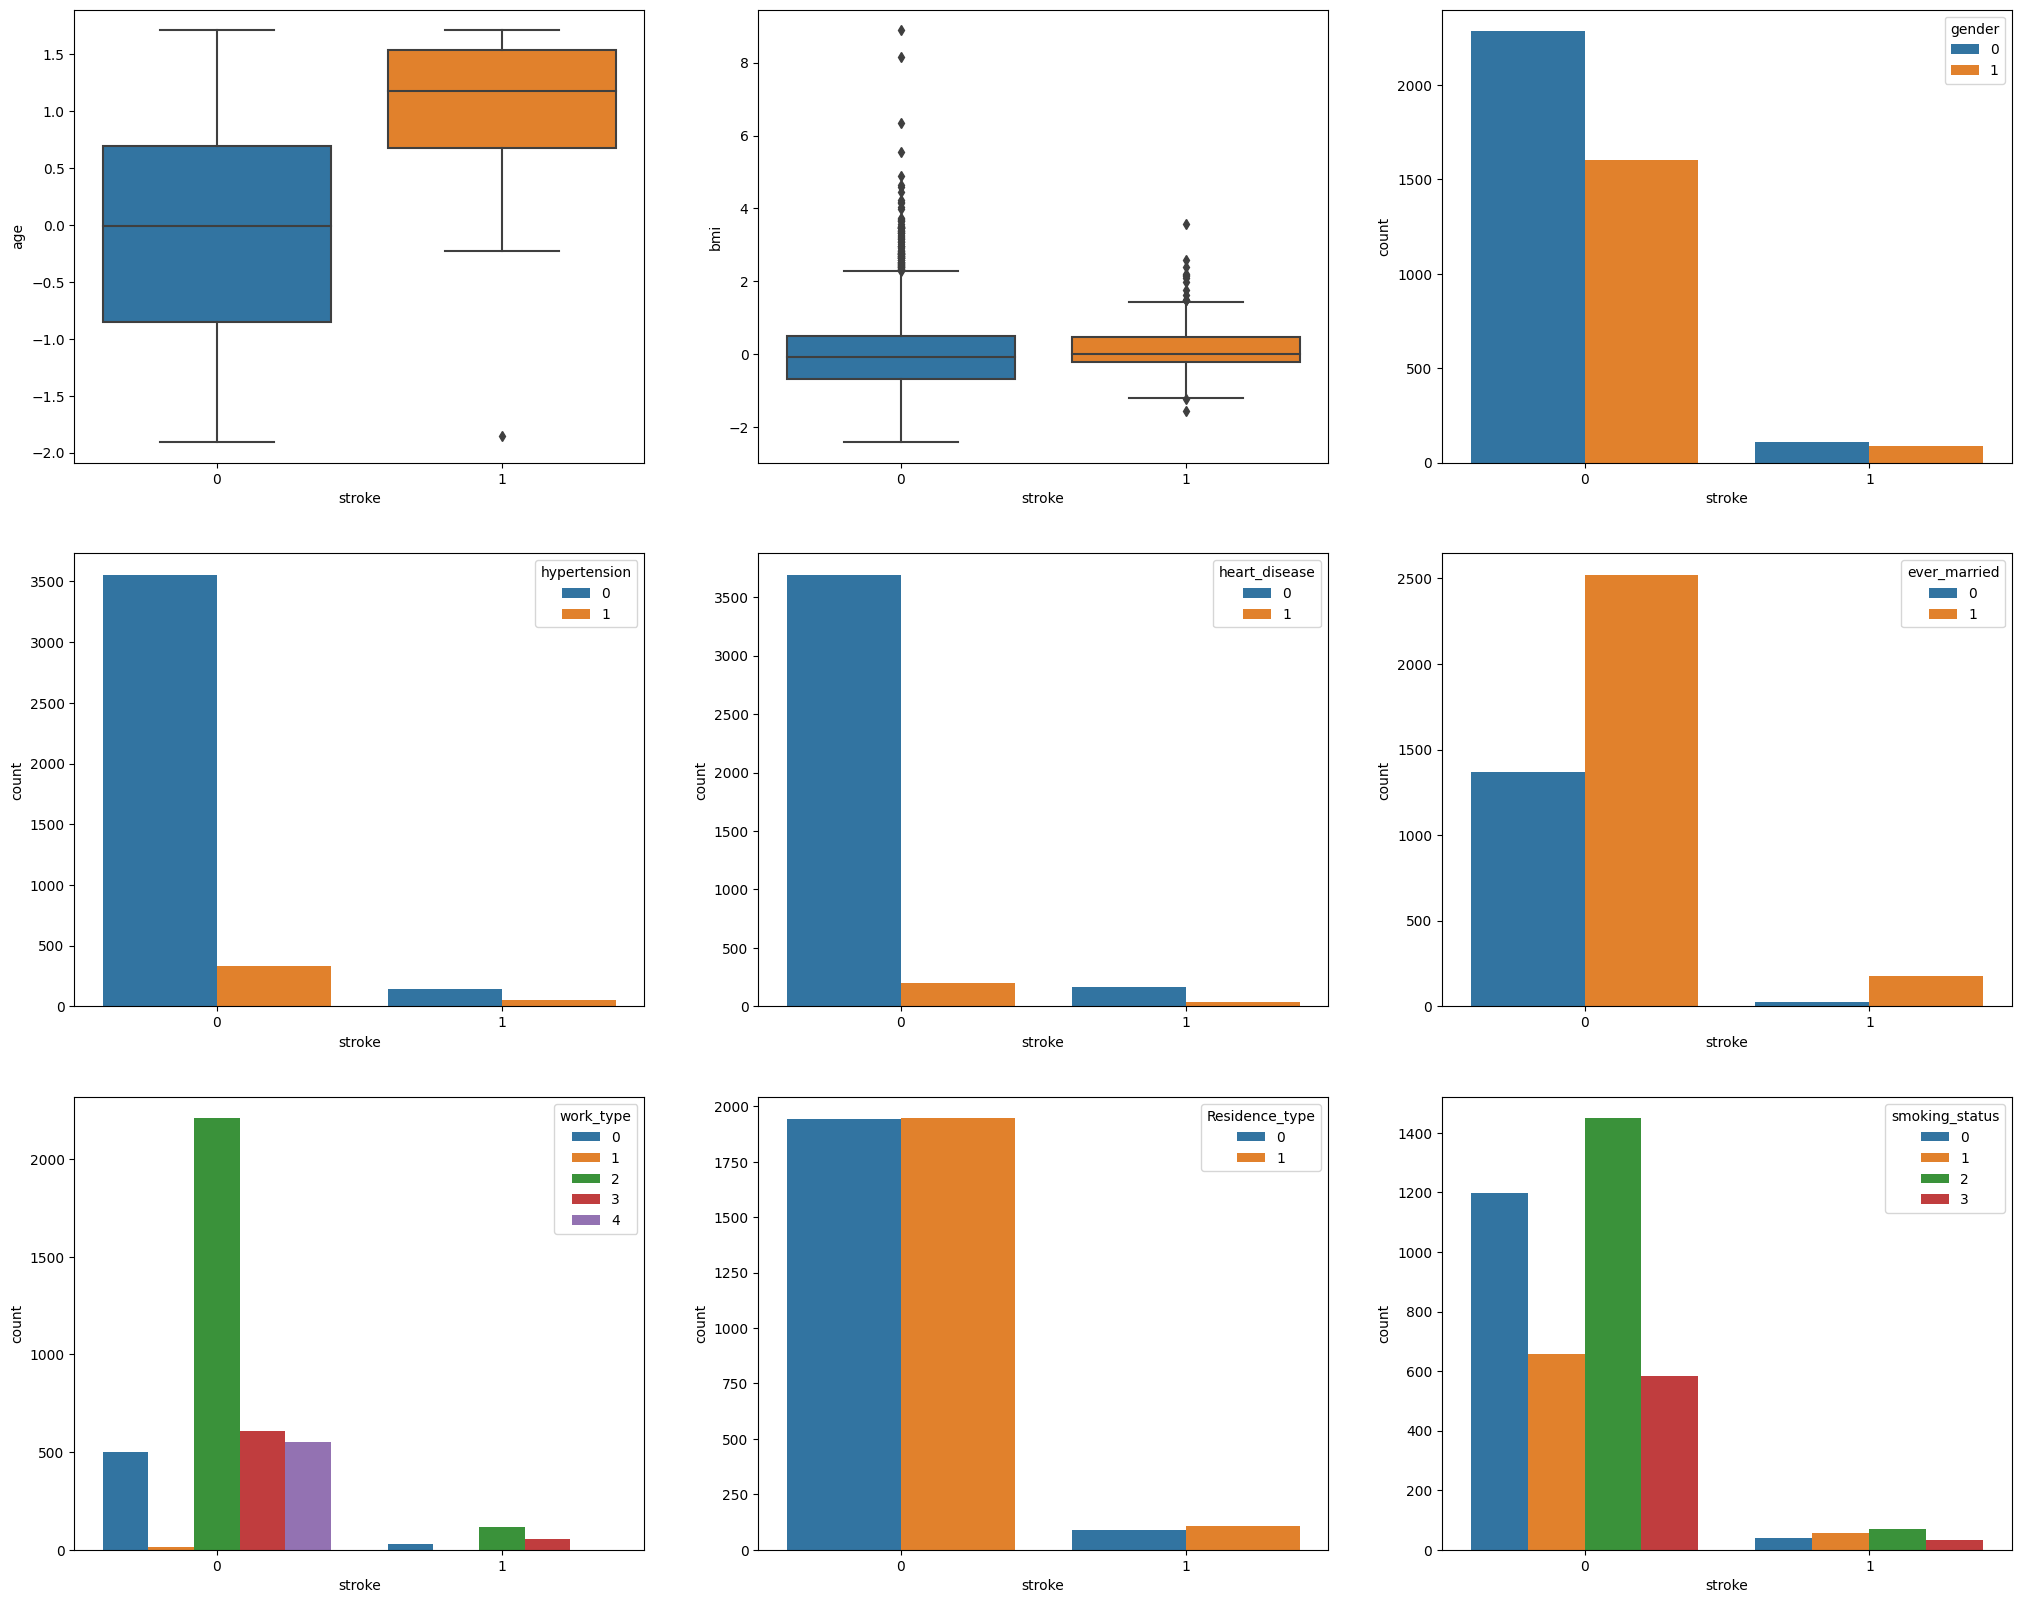

In [99]:
# Check the relationship between the features and the target variable
fig, axes = plt.subplots(3, 3, figsize=(25, 20), sharey=False)
sns.boxplot(x="stroke", y="age", data=train_data, ax=axes[0,0])
sns.boxplot(x="stroke", y="bmi", data=train_data, ax=axes[0,1])
sns.countplot(x="stroke", hue="gender", data=train_data, ax=axes[0,2])
sns.countplot(x="stroke", hue="hypertension", data=train_data, ax=axes[1,0])
sns.countplot(x="stroke", hue="heart_disease", data=train_data, ax=axes[1,1])
sns.countplot(x="stroke", hue="ever_married", data=train_data, ax=axes[1,2])
sns.countplot(x="stroke", hue="work_type", data=train_data, ax=axes[2,0])
sns.countplot(x="stroke", hue="Residence_type", data=train_data, ax=axes[2,1])
sns.countplot(x="stroke", hue="smoking_status", data=train_data, ax=axes[2,2])

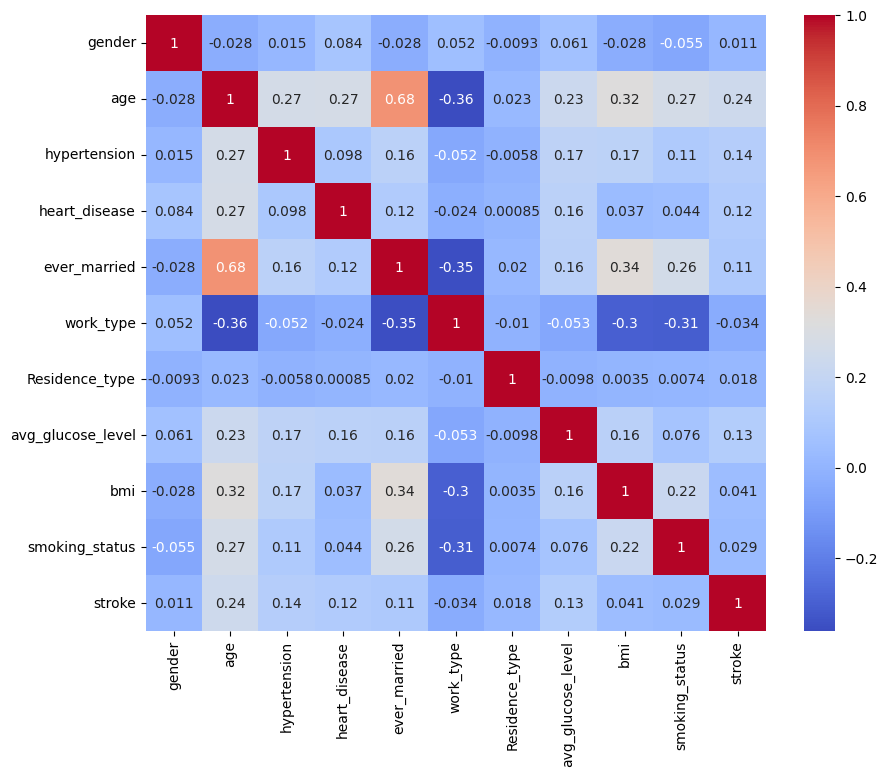

In [100]:
# Check the correlation between the features
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
plt.show()

Stroke is more common in older individuals, those with higher BMI, those with hypertension or heart disease, and those who have ever been married. Additionally, there were some differences in stroke rates based on gender, work type, residence type, and smoking status. There is a positive correlation between age and hypertension and heart disease, which may be useful in predicting stroke risk. 

Therefore, we performed feature selection to identify the most important features for predicting stroke risk. We used the `SelectKBest` method from the scikit-learn library to select the top 5 features based on `ANOVA F-value between label/feature for classification` tasks scores. 

In [101]:
# Select the top 5 most important features using SelectKBest and f_classif
selector = SelectKBest(score_func=f_classif, k=5)
# Fit the selector on the training data
selector.fit(X_train, y_train)

# Print the names of the most important features
selected_columns = selector.get_support(indices=True)
selected_features = X_train.columns[selected_columns].tolist()
print("selected features: ", selected_features )


selected features:  ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level']


### 6. Handling imbalanced target variable

Since the target variable (stroke) is imbalanced, we need to address this issue by either oversampling the minority class (positive stroke diagnosis) or undersampling the majority class (negative stroke diagnosis). There are different methods to achieve this, such as random oversampling, SMOTE (Synthetic Minority Over-sampling Technique), or random undersampling. **In this example, we used the random SMOTE method from the imbalanced-learn library to oversample the minority class.** This method generates synthetic samples for the minority class in a multidimensional feature space, providing a more diverse set of examples for the model to learn from, rather than just duplicating existing examples like in random oversampling. We applied SMOTE to the training set only to avoid data leakage.

In [102]:
# Handle imbalanced target variable using SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Check the shape of X_resampled and y_resampled
print("Shape of X_resampled: ", X_resampled.shape)
print("Shape of y_resampled: ", y_resampled.shape)

Shape of X_resampled:  (7776, 10)
Shape of y_resampled:  (7776,)


## Machine Learning Modeling

We selected below machine learning models to predict stroke risk:

| Algorithm | Pros | Cons |
| --------- | ---- | ---- |
| Perceptron | Fast training time, simple implementation | May not converge, requires linearly separable data |
| Logistic Regression | Probabilistic interpretation, handles non-linearities through feature engineering | Sensitive to outliers, may overfit |
| Decision Tree | Easy to interpret, handles both categorical and numerical data | Prone to overfitting, unstable with small variations in data |
| Random Forest | Robust to outliers, handles high dimensional data well | Slow for large datasets, harder to interpret |
| AdaBoost | Flexible and can handle non-linearities, works well with weak learners | Sensitive to noisy data, can overfit |
| Support Vector Machine | Handles non-linear data well, can work with high dimensional data | Slower training time for large datasets, can be sensitive to choice of kernel |
| K-Nearest Neighbors | Simple implementation, good for small datasets | Sensitive to choice of distance metric, computationally expensive for large datasets |
| MLPClassifier | Handles complex data, can learn non-linear decision boundaries | Requires large amounts of data, prone to overfitting |
| Gaussian Naive Bayes | Fast training time, handles categorical and numerical data well | Assumes independence between features, can suffer from zero-frequency problem |

In [103]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score

### 1. Use `all features` to construct machine learning models

In [104]:
# Use SMOTE resampled data to train the models


# Define a function to train and evaluate the models
def train_eval_model(classifier, X_train, y_train, X_test, y_test):
    # Train the model
    classifier.fit(X_train, y_train)
    # Predict on the test data
    y_pred = classifier.predict(X_test)
    # Print the evaluation metrics for the model
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_pred)
    print("AUC: ", auc.round(3))
    


In [105]:
# Perceptron
train_eval_model(Perceptron(random_state=42,max_iter=1000, tol=1e-3), X_resampled, y_resampled, X_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.18      0.16      0.17        50

    accuracy                           0.92      1022
   macro avg       0.57      0.56      0.57      1022
weighted avg       0.92      0.92      0.92      1022

AUC:  0.561


In [106]:
# Logistic Regression
train_eval_model(LogisticRegression(random_state=42, max_iter=1000), X_resampled, y_resampled, X_test, y_test)


              precision    recall  f1-score   support

           0       0.98      0.74      0.85       972
           1       0.13      0.78      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.76      0.54      1022
weighted avg       0.94      0.74      0.82      1022

AUC:  0.761


In [107]:
# Decision Tree
train_eval_model(DecisionTreeClassifier(random_state=42), X_resampled, y_resampled, X_test, y_test)


              precision    recall  f1-score   support

           0       0.96      0.89      0.92       972
           1       0.12      0.30      0.17        50

    accuracy                           0.86      1022
   macro avg       0.54      0.59      0.55      1022
weighted avg       0.92      0.86      0.89      1022

AUC:  0.593


In [108]:
# Random Forest
train_eval_model(RandomForestClassifier(random_state=42, n_estimators=100), X_resampled, y_resampled, X_test, y_test)


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.13      0.24      0.17        50

    accuracy                           0.89      1022
   macro avg       0.55      0.58      0.56      1022
weighted avg       0.92      0.89      0.90      1022

AUC:  0.58


In [109]:
# AdaBoost
train_eval_model(AdaBoostClassifier(random_state=42, n_estimators=100), X_resampled, y_resampled, X_test, y_test)


              precision    recall  f1-score   support

           0       0.98      0.73      0.84       972
           1       0.12      0.68      0.20        50

    accuracy                           0.73      1022
   macro avg       0.55      0.71      0.52      1022
weighted avg       0.94      0.73      0.81      1022

AUC:  0.707


In [110]:
# Support Vector Machine
train_eval_model(SVC(random_state=42), X_resampled, y_resampled, X_test, y_test)


              precision    recall  f1-score   support

           0       0.98      0.75      0.85       972
           1       0.12      0.66      0.20        50

    accuracy                           0.74      1022
   macro avg       0.55      0.70      0.52      1022
weighted avg       0.94      0.74      0.81      1022

AUC:  0.703


In [111]:

# KNeighborsClassifier
train_eval_model(KNeighborsClassifier(n_neighbors=4, weights="distance"), X_resampled, y_resampled, X_test, y_test)


              precision    recall  f1-score   support

           0       0.96      0.84      0.90       972
           1       0.10      0.36      0.16        50

    accuracy                           0.82      1022
   macro avg       0.53      0.60      0.53      1022
weighted avg       0.92      0.82      0.86      1022

AUC:  0.599


In [112]:
# MLPClassifier
train_eval_model(MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(10, 50, 10)), X_resampled, y_resampled, X_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       972
           1       0.12      0.38      0.18        50

    accuracy                           0.83      1022
   macro avg       0.54      0.62      0.54      1022
weighted avg       0.92      0.83      0.87      1022

AUC:  0.615


In [113]:
# Gaussian Naive Bayes
train_eval_model(GaussianNB(), X_resampled, y_resampled, X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.67      0.79       972
           1       0.10      0.76      0.18        50

    accuracy                           0.67      1022
   macro avg       0.54      0.71      0.49      1022
weighted avg       0.94      0.67      0.76      1022

AUC:  0.713


### 2. Use `five selected features` to construct machine learning models

In [114]:
# Use five selected features to train the models
X_resampled_selected = X_resampled[selected_features]
X_test_selected = X_test[selected_features]

# Show the shape of the training, validation and test sets
print("Features: ", X_resampled_selected.columns)


Features:  Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')


In [115]:
# Perceptron
train_eval_model(Perceptron(random_state=42,max_iter=1000, tol=1e-3), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.96      0.70      0.81       972
           1       0.06      0.40      0.11        50

    accuracy                           0.69      1022
   macro avg       0.51      0.55      0.46      1022
weighted avg       0.91      0.69      0.78      1022

AUC:  0.55


In [116]:
# Logistic Regression
train_eval_model(LogisticRegression(random_state=42, max_iter=1000), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.98      0.73      0.84       972
           1       0.13      0.78      0.22        50

    accuracy                           0.73      1022
   macro avg       0.56      0.76      0.53      1022
weighted avg       0.94      0.73      0.81      1022

AUC:  0.756


In [117]:
# Decision Tree
train_eval_model(DecisionTreeClassifier(random_state=42), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.11      0.18      0.14        50

    accuracy                           0.89      1022
   macro avg       0.53      0.55      0.54      1022
weighted avg       0.91      0.89      0.90      1022

AUC:  0.552


In [118]:
# Random Forest
train_eval_model(RandomForestClassifier(random_state=42, n_estimators=100), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       972
           1       0.11      0.34      0.17        50

    accuracy                           0.84      1022
   macro avg       0.54      0.60      0.54      1022
weighted avg       0.92      0.84      0.87      1022

AUC:  0.602


In [119]:
# AdaBoost
train_eval_model(AdaBoostClassifier(random_state=42, n_estimators=100), X_resampled_selected, y_resampled, X_test_selected, y_test)


              precision    recall  f1-score   support

           0       0.98      0.70      0.82       972
           1       0.11      0.72      0.19        50

    accuracy                           0.70      1022
   macro avg       0.54      0.71      0.50      1022
weighted avg       0.94      0.70      0.79      1022

AUC:  0.71


In [120]:
# Support Vector Machine
train_eval_model(SVC(random_state=42), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.98      0.69      0.81       972
           1       0.10      0.68      0.17        50

    accuracy                           0.69      1022
   macro avg       0.54      0.68      0.49      1022
weighted avg       0.93      0.69      0.78      1022

AUC:  0.683


In [121]:
# KNeighborsClassifier
train_eval_model(KNeighborsClassifier(n_neighbors=4, weights="distance"), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       972
           1       0.13      0.60      0.22        50

    accuracy                           0.79      1022
   macro avg       0.55      0.70      0.55      1022
weighted avg       0.93      0.79      0.84      1022

AUC:  0.698


In [122]:
# MLPClassifier
train_eval_model(MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(10, 50, 10)), X_resampled_selected, y_resampled, X_test_selected, y_test)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       972
           1       0.12      0.72      0.21        50

    accuracy                           0.74      1022
   macro avg       0.55      0.73      0.53      1022
weighted avg       0.94      0.74      0.81      1022

AUC:  0.729


In [123]:
# Gaussian Naive Bayes
train_eval_model(GaussianNB(), X_resampled_selected, y_resampled, X_test_selected, y_test)


              precision    recall  f1-score   support

           0       0.98      0.67      0.80       972
           1       0.11      0.78      0.19        50

    accuracy                           0.68      1022
   macro avg       0.55      0.73      0.50      1022
weighted avg       0.94      0.68      0.77      1022

AUC:  0.726


## Conclusion

### 1. Stroke Prediction Results
The table below summarizes the performance of these machine learning algorithms on the task of predicting stroke. Each algorithm was evaluated twice: once using all available features, and once using only the top five features. The performance was evaluated in terms of accuracy and the area under the receiver operating characteristic curve (AUC).:

| Algorithm | Accuracy (All Features) | Accuracy (Five Features) | AUC (All Features) | AUC (Five Features) | 
| --------- | ---- | ---- | ---- | ---- |
| Perceptron | 0.92 | 0.69 | 0.561 | 0.550 |
| Logistic Regression | 0.74 | 0.73 | 0.761 | 0.756 |
| Decision Tree | 0.86 | 0.89 | 0.593 | 0.552 |
| Random Forest | 0.89 | 0.84 | 0.580 | 0.602 |
| AdaBoost | 0.73 | 0.70 | 0.707 | 0.710 |
| Support Vector Machine | 0.74 | 0.69 | 0.703 | 0.683 |
| K-Nearest Neighbors | 0.82 | 0.79 | 0.599 | 0.698 |
| MLPClassifier | 0.83 | 0.74 | 0.615 | 0.729 |
| Gaussian Naive Bayes | 0.67 | 0.68 | 0.713 | 0.726 |

Note:

All Features are: 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age', 'bmi', 'avg_glucose_level'.

Five Selected Features are: 'hypertension', 'heart_disease', 'ever_married', 'age', 'avg_glucose_level'.

### 2. Conclusions

Overall, the Logistic Regression algorithm achieved the highest AUC, both when using all features and when using only the top five features. This suggests that this algorithm is particularly effective at distinguishing between positive and negative classes in this dataset. The Perceptron yielded the highest accuracy when using all features, but the Decision Tree algorithm was the most accurate when only the top five features were used.

It's worth noting that while accuracy gives us a general idea of how often the model predicts the correct class, the AUC is a better indicator of the model's performance across different decision thresholds. Especially in the case of imbalanced datasets, accuracy can be misleading, since it does not take into account the true negatives. Therefore, the models with higher AUC are considered to be performing better in terms of distinguishing between the classes.

Interestingly, for some algorithms (like Random Forest, AdaBoost, K-Nearest Neighbors, MLPClassifier, Gaussian Naive Bayes), the AUC actually increased when fewer features were used. This might be an indication that some of the features in the full dataset are not particularly informative, or perhaps even misleading, and eliminating them improved the models' performance.

However, for other algorithms (like Perceptron, Logistic Regression, Decision Tree, Support Vector Machine), the use of fewer features resulted in slightly lower AUC. This might be an indication that these algorithms were able to make good use of the additional information provided by the excluded features.

In conclusion, while each algorithm has its strengths and weaknesses, the Logistic Regression algorithm appears to offer the best performance for predicting stroke in this particular dataset, according to the AUC metric. However, further tuning of the models' parameters could potentially improve their performance.

### 3. Future work

This project aimed to perform exploratory data analysis and compare various machine learning models to predict stroke risk. The models' performance was evaluated using all features and a select few deemed most important. However, it's important to note that this is just the beginning. There are many paths we can take to potentially enhance model performance, such as:

- `Refining Preprocessing Methods`: The common methods we used for handling missing values, encoding categorical variables, and scaling features were a starting point. Trying different imputation methods, encoding techniques, or feature scaling methods could lead to improved model performance.

- `Sampling Techniques Exploration`: While Synthetic Minority Over-sampling Technique (SMOTE) is an effective way to handle imbalanced datasets, we could also test other techniques, like random oversampling or Adaptive Synthetic Sampling (ADASYN), to check if they yield better results.

- `Feature Selection Techniques`: This study used Univariate feature selection with the f_classif score function. However, various other feature selection techniques, such as Recursive Feature Elimination, Principal Component Analysis, or SelectFromModel, could also be explored to potentially improve the results.

- `Incorporation of Domain Knowledge:` Our study focused primarily on using machine learning algorithms to predict stroke risk. However, integrating more domain knowledge into the analysis could prove beneficial. This might involve consulting with medical professionals to identify additional relevant features or exploring different ways of defining the target variable.

- `Experimentation with Different Models`: We tested several machine learning algorithms in this study, but there are many others worth exploring. Models such as Gradient Boosting or XGBoost could potentially improve performance. Additionally, ensemble methods like Stacking or Voting could also be experimented with for accuracy improvement.

- `Hyperparameter Tuning`: The hyperparameters used in this study were mostly default values. However, trying different hyperparameter settings for each model could lead to performance improvements. For instance, in the Random Forest model, we could vary the number of estimators, maximum depth, or minimum samples per leaf. In SVM, we might consider different kernels, regularization strengths, or gamma values. For the MLPClassifier, different hidden layer sizes, activation functions, or learning rates could be explored. To ensure our models generalize well to unseen data and aren't just fitting well to our specific train-test split, `Cross-validation` can be used during this process to provide a robust measure of model performance for each set of hyperparameters. 

In conclusion, the journey to perfecting a machine learning model is iterative and continuous, involving a lot of experimentation and fine-tuning. This study serves as a foundational step in that journey.

